<a href="https://colab.research.google.com/github/codelspak/Codelion_weekly_projects/blob/main/WK28_W9_Mini_project__Kaggle_DL_Regression_%EA%B5%AC%EB%82%B4%EC%8B%9D%EB%8B%B9_%EC%8B%9D%EC%88%98_%EC%9D%B8%EC%9B%90_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제상황
평가산식 : MAE(Mean Absolute Error)

# 1. 라이브러리 및 데이터 불러오기


In [1]:
!pip install koreanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/WK28_WK9_DL_구내식당 식수 인원 예측/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/WK28_WK9_DL_구내식당 식수 인원 예측/test.csv')
submit = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Codelion_weekly assignments/WK28_WK9_DL_구내식당 식수 인원 예측/sample_submission.csv')

In [5]:
train.shape, test.shape, submit.shape

((1205, 12), (50, 10), (50, 3))

In [6]:
set(train.columns.tolist()) - set(test.columns.tolist()), submit.columns

({'석식계', '중식계'}, Index(['일자', '중식계', '석식계'], dtype='object'))

# 2. 데이터 EDA


In [ ]:
train.head(3)

In [ ]:
train.sample(3)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [10]:
# 컬럼 별 결측치 수 / 비율 확인 함수
def missing_values(dataframe) : 
    no_missing_values = dataframe.isnull().sum()
    prop_missing_values = round(dataframe.isnull().sum()/len(dataframe)*100,1)

    df_null = pd.concat([no_missing_values, prop_missing_values], axis = 1)
    df_null = df_null.rename(columns = {0:'결측치 수', 1:'결측치 비율'}, )

    return df_null

In [11]:
# 결측치 확인
missing_values(train)

,결측치 수,결측치 비율
일자,0,0.0
요일,0,0.0
본사정원수,0,0.0
본사휴가자수,0,0.0
본사출장자수,0,0.0
본사시간외근무명령서승인건수,0,0.0
현본사소속재택근무자수,0,0.0
조식메뉴,0,0.0
중식메뉴,0,0.0
석식메뉴,0,0.0


In [ ]:
missing_values(test)

In [13]:
# 기술통계 
train.describe().round(2)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계
count,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00,1205.00
mean,2807.82,157.91,241.14,274.12,43.51,890.33,461.77
std,171.26,144.19,43.53,246.24,109.94,209.51,139.18
min,2601.00,23.00,41.00,0.00,0.00,296.00,0.00
25%,2645.00,71.00,217.00,4.00,0.00,758.00,406.00
50%,2760.00,105.00,245.00,299.00,0.00,879.00,483.00
75%,2962.00,185.00,272.00,452.00,0.00,1032.00,545.00
max,3305.00,1224.00,378.00,1044.00,533.00,1459.00,905.00


In [14]:
train.describe(include = ['O'])


,일자,요일,조식메뉴,중식메뉴,석식메뉴
count,1205,1205,1205,1205,1205
unique,1205,5,1204,1198,1168
top,2016-02-01,목,모닝롤/프렌치토스트 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 무채국 김...,쌀밥/잡곡밥 (쌀:국내산) 시금치된장국 훈제오리구이 실곤약무침 무쌈/양파절임 ...,*
freq,1,244,2,2,19


뜬금없지만, 조식메뉴는 있는데 조식계 숫자는 왜 안 줌?

날짜 관련 피쳐들

In [15]:
# 일자 
# fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (20,3))
# sns.histplot(data = train[['일자', '중식계']], x = '일자', y = '중식계', ax = ax1)
# sns.histplot(data = train[['일자', '석식계']], x = '일자', y = '석식계',ax = ax2)
# plt.show()

In [16]:
# 날짜 관련 파생변수 생성1
train['연도'] = train.일자.map(lambda x : x.split("-")[0])
train['월'] = train.일자.map(lambda x : x.split("-")[1])
train['일'] = train.일자.map(lambda x : x.split("-")[2])
train.iloc[:3, -3:]

,연도,월,일
0,2016,02,01
1,2016,02,02
2,2016,02,03


In [17]:
pd.crosstab(index = train.연도, columns = train.월, margins = True)

월,01,02,03,04,05,06,07,08,09,10,11,12,All
연도,,,,,,,,,,,,,
2016,0,18,22,20,20,21,21,22,19,20,22,22,227
2017,20,20,22,20,19,21,21,22,21,16,22,20,244
2018,22,18,21,21,20,19,22,22,15,17,22,20,239
2019,22,17,20,22,21,19,23,21,19,20,21,21,246
2020,20,20,22,20,19,10,23,20,20,19,21,18,232
2021,17,0,0,0,0,0,0,0,0,0,0,0,17
All,101,93,107,103,99,90,110,107,94,92,108,101,1205


위 테이블의 값은 '샘플 수' 자체를 의미함<br>
1월 / 2월 / 5월 / 6월 / 9월 / 10월 / 12월엔 샘플 수가 약 10% 정도 적은 걸 알 수 있음. 16-20년 5개년 치 임을 고려했을 때, 매년 각 달에 약 2일씩 회사가 쉬었음을 알 수 있음. 그 이유는 다음과 같음.<br>
1. 1월 / 9월 / 10월 : 설날, 추석
2. 2월 : 그냥 다른 달에 비해 일수 자체가 적음
3. 5월 : 근로자의 날, 어린이 날, 부처님 오신 날 등 공휴일이 많음
4. 6월 : **2020년 데이터가 이상**함. 누락된 것 같음. 
    - 근데 결측치 없었음. 따라서 값들에 0 등 의미없는 값이 있는지 확인이 필요할 것 같음
5. 12월 : 2020년 데이터만 추가로 확인해보자


In [18]:
# 2018년 9월 데이터 : 그냥 14일부터 일주일 치 데이터가 누락되었음
train.loc[
          (train.연도 == '2018') & (train.월 == '09'), ['일자', '요일']
].value_counts()

일자          요일
2018-09-03  월     1
2018-09-04  화     1
2018-09-05  수     1
2018-09-06  목     1
2018-09-07  금     1
2018-09-10  월     1
2018-09-11  화     1
2018-09-12  수     1
2018-09-13  목     1
2018-09-14  금     1
2018-09-17  월     1
2018-09-18  화     1
2018-09-19  수     1
2018-09-20  목     1
2018-09-21  금     1
dtype: int64

In [19]:
# 2020년 6월 데이터 : 그냥 13일부터 2주치 데이터가 누락되었음
train.loc[
          (train.연도 == '2020') & (train.월 == '06'), ['일자', '요일']
].value_counts()

일자          요일
2020-06-01  월     1
2020-06-02  화     1
2020-06-03  수     1
2020-06-04  목     1
2020-06-05  금     1
2020-06-08  월     1
2020-06-09  화     1
2020-06-10  수     1
2020-06-11  목     1
2020-06-12  금     1
dtype: int64

In [20]:
# 2020년 12월 데이터 : 28일부터 일주일치 데이터 누락되었음
train.loc[
          (train.연도 == '2020') & (train.월 == '12'), ['일자', '요일']
].value_counts().sort_index()

일자          요일
2020-12-01  화     1
2020-12-02  수     1
2020-12-03  목     1
2020-12-04  금     1
2020-12-07  월     1
2020-12-08  화     1
2020-12-09  수     1
2020-12-10  목     1
2020-12-11  금     1
2020-12-14  월     1
2020-12-15  화     1
2020-12-16  수     1
2020-12-17  목     1
2020-12-18  금     1
2020-12-21  월     1
2020-12-22  화     1
2020-12-23  수     1
2020-12-24  목     1
dtype: int64

In [21]:
pd.crosstab(index = train.연도, columns = train.월, values = train.중식계, aggfunc = 'mean', margins = True).round(1)

월,01,02,03,04,05,06,07,08,09,10,11,12,All
연도,,,,,,,,,,,,,
2016,NaN,967.9,962.2,893.8,943.4,932.8,904.1,912.4,950.6,1010.8,952.7,842.1,932.8
2017,1004.2,1024.7,948.0,868.0,858.1,871.2,861.4,866.0,905.0,942.6,851.2,783.4,897.6
2018,952.9,1007.3,967.9,879.2,886.1,874.7,848.4,846.2,886.7,916.4,799.1,752.4,882.9
2019,888.3,1003.8,930.4,855.5,843.8,820.8,807.8,819.9,919.6,868.0,752.6,735.5,850.5
2020,830.3,946.2,958.1,924.6,815.6,760.0,827.8,825.1,871.6,852.7,878.1,1048.5,882.3
2021,1009.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1009.7
All,934.2,989.6,953.6,883.6,869.8,863.3,848.7,854.8,907.1,917.8,847.3,827.3,890.3


In [22]:
# 분명 결측치가 없었는데, 위의 NaN 값은 뭘까? 2021년도 데이터 뜯어보자
train.loc[(train.연도 =='2021')&(train.중식계.isnull())]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도,월,일


In [23]:
# 분명 결측치가 없었는데, 위의 NaN 값은 뭘까? 2021년도 데이터 뜯어보자 - nan값 있는지 확인
train.loc[(train.연도 =='2021')&(train.중식계==np.nan)]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도,월,일


In [24]:
train.중식계.dtype

dtype('float64')

In [25]:
# null값은 없는데. 혹시 그럼 아스키코드 등 이상한 형태로 되어 있는 애들이 있는지 살펴보자
isinstance(pd.DataFrame(train.중식계.unique()), float)


False

In [26]:
train.loc[
          (train.연도 == '2020') & (train.월 == '02'), ['중식계', '석식계']
].sort_values('중식계', ascending = True).head()

,중식계,석식계
980,539.0,326.0
990,627.0,380.0
979,637.0,369.0
978,660.0,276.0
995,750.0,414.0


In [27]:
pd.crosstab(index = train.연도, columns = train.월, values = train.석식계, aggfunc = 'mean', margins = True).round(1)

월,01,02,03,04,05,06,07,08,09,10,11,12,All
연도,,,,,,,,,,,,,
2016,NaN,531.4,556.2,533.2,534.7,534.7,511.8,510.1,543.2,555.4,489.1,425.5,519.4
2017,456.6,539.0,504.3,445.8,438.9,444.7,442.2,459.4,436.8,492.9,430.7,399.8,457.0
2018,449.7,500.1,520.6,477.1,457.2,459.5,457.3,474.3,462.1,481.3,438.2,390.8,463.5
2019,438.4,516.4,520.6,477.1,454.3,437.4,407.0,431.1,470.5,462.2,407.6,344.0,445.4
2020,373.4,487.9,550.5,471.4,402.0,382.6,376.0,417.4,410.9,415.2,403.0,451.1,430.7
2021,396.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.6
All,424.6,514.9,530.7,480.8,458.1,460.4,437.3,459.5,463.6,481.6,434.2,401.2,461.8


In [28]:
# 날짜 관련 파생변수 생성2 : 계절 - 얘는 샘플 수 보다는, 근무 인원 대비 중식계/석식계 숫자 분포에 영향을 미치는 피처가 될 듯
dict_season = {'01':'겨울', '02':'겨울', '03':'봄', '04':'봄', '05':'봄', '06':'여름', '07':'여름', '08':'여름', '09':'가을', '10':'가을', '11':'가을', '12':'겨울', }
train['계절'] = train.월.map(lambda x : dict_season[x])
train.iloc[:3, -4:]

,연도,월,일,계절
0,2016,02,01,겨울
1,2016,02,02,겨울
2,2016,02,03,겨울


In [29]:
# 요일

### 본사 근무 인원 관련 피쳐들

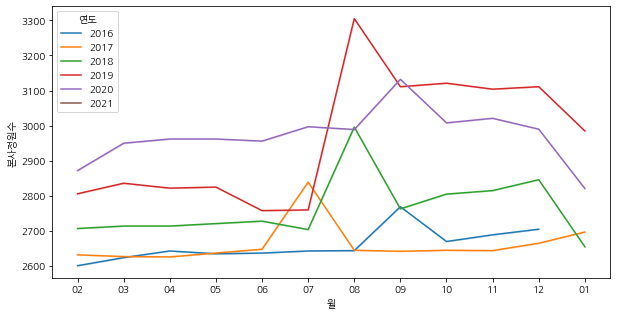

In [30]:
# 본사 정원수
plt.figure(figsize = (10, 5))
sns.lineplot(data = train, x = '월', y = '본사정원수', hue = '연도', )
plt.show()

In [31]:
# 일자에 따른 정원 수 변동은 없음 - 무조건 월 기준
train.groupby(by = ['연도', '월'], as_index = False)['본사정원수'].nunique()['본사정원수'].unique()

array([1])

In [32]:
# 공통적으로 여름에 정원이 튀는 게 이상함. 신입사원 채용 등의 이유인지 확인하기 위해, 제일 이상한 2019년 / 2020년 데이터 비교해보기로 함
train.loc[
          (train.연도=='2019') & (train.월.isin(['07', '08'])) & (train.본사정원수>3000),:'현본사소속재택근무자수'].sort_values('일자', ascending = True)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수
854,2019-08-01,목,3305,546,219,285,0.0
855,2019-08-02,금,3305,687,237,2,0.0
856,2019-08-05,월,3305,462,183,392,0.0
857,2019-08-06,화,3305,427,203,392,0.0
858,2019-08-07,수,3305,421,233,1,0.0
859,2019-08-08,목,3305,430,254,364,0.0
860,2019-08-09,금,3305,496,261,3,0.0
861,2019-08-12,월,3305,394,208,424,0.0
862,2019-08-13,화,3305,345,254,411,0.0
863,2019-08-14,수,3305,430,246,2,0.0


In [33]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도,월,일,계절
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,02,01,겨울
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,02,02,겨울
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,02,03,겨울


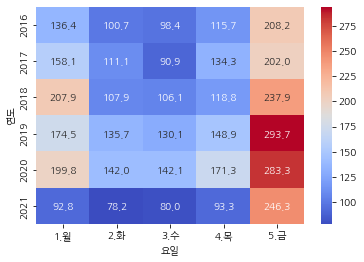

In [34]:
# 본사휴가자수 (-)
no_off = pd.crosstab(index = train.요일, columns = train.연도, values = train.본사휴가자수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'월':'1.월', '화':'2.화', '수':'3.수', '목':'4.목', '금':'5.금'}).sort_index(ascending = True).T
sns.heatmap(no_off, cmap = 'coolwarm', annot = True, fmt = ',.1f')

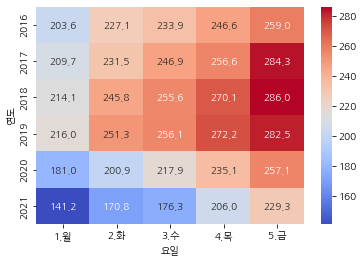

In [35]:
# 본사출장자수 : (-) - 경험 상, 누가 출장오면 오히려 다 같이 외식하러 감
no_trip = pd.crosstab(index = train.요일, columns = train.연도, values = train.본사출장자수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'월':'1.월', '화':'2.화', '수':'3.수', '목':'4.목', '금':'5.금'}).sort_index(ascending = True).T
sns.heatmap(no_trip, cmap = 'coolwarm', annot = True, fmt = ',.1f')

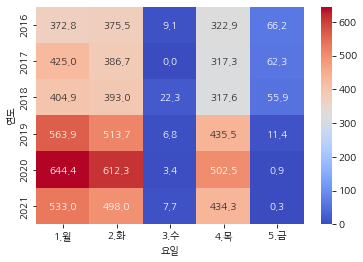

In [36]:
# 본사시간외근무명령서승인건수 (+)
no_overtime = pd.crosstab(index = train.요일, columns = train.연도, values = train.본사시간외근무명령서승인건수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'월':'1.월', '화':'2.화', '수':'3.수', '목':'4.목', '금':'5.금'}).sort_index(ascending = True).T
sns.heatmap(no_overtime, cmap = 'coolwarm', annot = True, fmt = ',.1f')

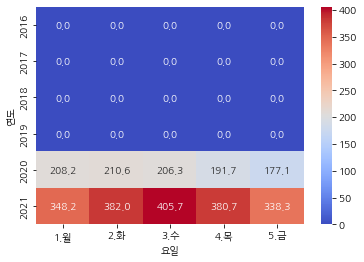

In [37]:
# 현본사소속재택근무자수 (-)
no_wfh = pd.crosstab(index = train.요일, columns = train.연도, values = train.현본사소속재택근무자수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'월':'1.월', '화':'2.화', '수':'3.수', '목':'4.목', '금':'5.금'}).sort_index(ascending = True).T
sns.heatmap(no_wfh, cmap = 'coolwarm', annot = True, fmt = ',.1f')

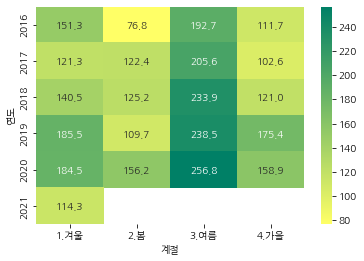

In [38]:
# 계절에 따른 변화도 있을까
no_off = pd.crosstab(index = train.계절, columns = train.연도, values = train.본사휴가자수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'봄':'2.봄', '여름':'3.여름', '가을':'4.가을', '겨울':'1.겨울'}).sort_index(ascending = True).T
sns.heatmap(no_off, cmap = 'summer_r', annot = True, fmt = ',.1f')

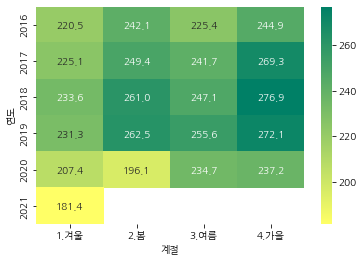

In [39]:
no_trip = pd.crosstab(index = train.계절, columns = train.연도, values = train.본사출장자수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'봄':'2.봄', '여름':'3.여름', '가을':'4.가을', '겨울':'1.겨울'}).sort_index(ascending = True).T
sns.heatmap(no_trip, cmap = 'summer_r', annot = True, fmt = ',.1f')

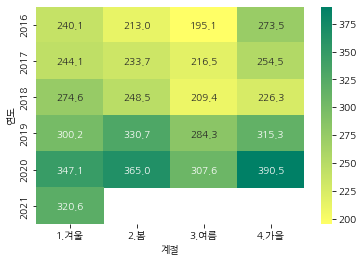

In [40]:
no_overtime = pd.crosstab(index = train.계절, columns = train.연도, values = train.본사시간외근무명령서승인건수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'봄':'2.봄', '여름':'3.여름', '가을':'4.가을', '겨울':'1.겨울'}).sort_index(ascending = True).T
sns.heatmap(no_overtime, cmap = 'summer_r', annot = True, fmt = ',.1f')

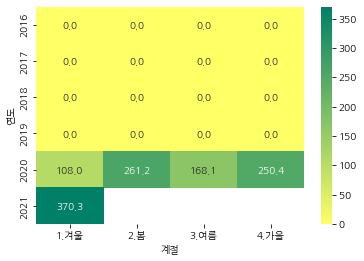

In [41]:
no_wfh = pd.crosstab(index = train.계절, columns = train.연도, values = train.현본사소속재택근무자수, 
                     aggfunc = 'mean', ).round(1).rename(index = {'봄':'2.봄', '여름':'3.여름', '가을':'4.가을', '겨울':'1.겨울'}).sort_index(ascending = True).T
sns.heatmap(no_wfh, cmap = 'summer_r', annot = True, fmt = ',.1f')

### 메뉴 관련 피쳐들

In [42]:
# 조식메뉴
train.조식메뉴.unique().tolist()

['모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐어채무침  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌개  시래기조림  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국  느타리호박볶음  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국  멸치볶음  포기김치 (배추,고추가루:국내산) ',
 '모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방풍나물  포기김치 (배추,고추가루:국내산) ',
 '팬케익/찐빵  우유/두유/주스  계란후라이  견과류죽/쌀밥 (쌀:국내산) 감자찌개  명엽채무침 포기김치 (김치:국내산) ',
 '모닝롤/야채샌드  우유/두유/주스  계란후라이  고구마죽/쌀밥 (쌀:국내산) 봄동된장국  숙주나물 포기김치 (김치:국내산) ',
 '모닝롤/치즈프레즐  우유/두유/주스  계란후라이  잣죽/쌀밥 (쌀:국내산) 민물새우찌개  콩조림 포기김치 (김치:국내산) ',
 '모닝롤/마늘빵  우유/두유/주스  계란후라이  단호박죽/쌀밥 (쌀:국내산) 어묵국  김구이 포기김치 (김치:국내산) ',
 '모닝롤/참치샌드  우유/두유/주스  계란후라이  흑임자죽/쌀밥 (쌀:국내산) 북어계란국  무생채 포기김치 (김치:국내산) ',
 '모닝롤/인절미토스트  우유/두유/주스  계란후라이  계란후라이  (쌀:국내산) 선지해장국 (쇠고기:호주산) 톳두부무침 포기김치 (김치:국내산) ',
 '모닝롤/씨크립샌드  우유/두유/주스  계란후라이  밤죽/쌀밥 (쌀:국내산) 홍합탕  오이생채 포기김치 (김치:국내산) ',
 '모닝롤/팬케익  우유/주스  계란후라이  브로컬리죽/쌀밥 (쌀:국내산) 고추장찌개  시금치나물 포기김치 (고춧가루:국내산) ',
 '모닝롤/야채샌드  우유/주스 

###### 중식메뉴 세분화

In [43]:
# 중식메뉴
df_menu_lunch = pd.DataFrame(train.중식메뉴.unique().tolist())
df_menu_lunch['메뉴원본'] = df_menu_lunch[0].apply(lambda x : x.replace("  ", "/").replace(" ", "/").replace("//", "/").replace("/(", "").strip("/").\
                                          replace('밥/잡', "밥잡").replace('밥/흑', "밥흑").replace('밥/수', "밥수").replace('밥/찰', "밥찰").replace('밥/검', "밥검").\
                                          replace('밥/렌', "밥렌").replace('밥/귀', "밥귀").replace('밥/오', "밥오").replace('밥/치', "밥치").replace('밥/병', "밥병").replace('밥/보', "밥보").\
                                          replace('밥/기', "밥기").replace('밥/곤', "밥곤").replace('밥/팥', "밥팥").replace('밥/차', "밥차").replace('>/', "/"))
df_menu_lunch.sample(3)

,0,메뉴원본
903,쌀밥/잡곡밥 (쌀:국내산) 얼큰순두부찌개 짬뽕불고기 잡채 도토리묵무침 포기김...,쌀밥잡곡밥쌀:국내산)/얼큰순두부찌개/짬뽕불고기/잡채/도토리묵무침/포기김치김치:국내산)
759,쌀밥/잡곡밥 (쌀:국내산) 아욱국 동파육 계란찜 쫑상추무침 배추겉절이 (김치...,쌀밥잡곡밥쌀:국내산)/아욱국/동파육/계란찜/쫑상추무침/배추겉절이김치:국내산)
428,쌀밥/잡곡밥 (쌀:국내산) 근대국 돈삼겹보쌈 옥수수전 콩나물파채/상추쌈 배추...,쌀밥잡곡밥쌀:국내산)/근대국/돈삼겹보쌈/옥수수전/콩나물파채/상추쌈/배추겉절이김치:국내산)


In [44]:
# (Index error 기인) 메뉴 수 확인
temp = [len(df_menu_lunch.loc[index,'메뉴원본'].split('/')) for index in range(len(df_menu_lunch))]
df_no_lunch = pd.DataFrame(temp)
# df_no_lunch.sort_values(0, ascending = True)
print(np.unique(df_no_lunch.sort_values(0, ascending = True)))


[ 5  6  7  8  9 10]


In [45]:
# 메뉴수1
list_temp = df_no_lunch[df_no_lunch[0]==6].index.tolist()
temp = [df_menu_lunch.loc[index, '메뉴원본'] for index in list_temp]
temp[:3]

['쌀밥잡곡밥쌀,현미흑미:국내산)/쇠고기미역국/주꾸미볶음/맛살계란말이/아삭고추무침/포기김치배추,고추가루:국내산)',
 '쌀밥잡곡밥쌀,현미흑미:국내산)/부대찌개/가자미튀김/메추리알조림/열무된장나물/깍두기김치:국내산)',
 '쌀밥잡곡밥쌀,현미흑미:국내산)/콩나물국/닭갈비닭고기:국내산)/모둠묵*양념장/톳두부무침/포기김치김치:국내산)']

In [46]:
# 메뉴수2
list_temp = df_no_lunch[df_no_lunch[0]==9].index.tolist()
temp = [df_menu_lunch.loc[index, '메뉴원본'] for index in list_temp]
temp[:10]

['쌀밥잡곡밥/맑은콩나물국/돈육고추장볶음/쌈채소&쌈장/무채와사비무침/콩자반/포기김치/양상추샐러드/마카로니샐러드',
 '쌀밥검정콩밥찰현미밥/건새우아욱국/쭈삼불고기/분홍소시지전/새송이전/파프리카해초무침/포기김치/찐옥수수/콜리샐러드*발사믹D',
 '쌀밥렌틸콩밥찰현미밥/떡국/매운쇠고기버섯볶음/양배추/케일숙쌈*양념간장/더덕무침/포기김치/수떡수떡화채/푸실리파스타샐러드',
 '쌀밥흑미밥찰현미밥/감자수제비국/쇠고기낙지볶음/채소탕수(연근/브로콜리/단호박)/건새우호박볶음/포기김치/양상추샐러드*매실D',
 '쌀밥흑미밥찰현미밥/떡만두국/오리대패불고기/꽁치캔김치조림/파프리카해초무침/포기김치/사과/식혜/양상추샐러드*딸기D',
 '쌀밥흑미밥찰현미밥/얼갈이된장국/쭈꾸미삼겹살볶음/단호박어묵탕수/쌈추/와사비무쌈*쌈장/포기김치/푸딩/양상추샐러드*딸기D',
 '쌀밥귀리밥찰현미밥/미역국/동파육/청경채/버섯숙회*초장/도라지볶음/겉절이김치/꽈배기도넛/양상추샐러드*포도D',
 '쌀밥찰보리밥찰현미밥/김치두부국/LA갈비구이/한식잡채/삼색유자청무침/포기김치/오프룻요거트/펜네파스타샐러드/축하떡',
 '쌀밥흑미밥찰현미밥/소고기떡국/봉추찜닭/오미산적/동태전/콩나물잡채/포기김치/식혜/양상추샐러드*요거트감귤D']

In [47]:
df_menu_lunch['밥류'] = df_menu_lunch.loc[:,'메뉴원본'].apply(lambda x : x.split('/')[0])
df_menu_lunch['국류'] = df_menu_lunch.loc[:,'메뉴원본'].apply(lambda x : x.split('/')[1])
df_menu_lunch['메인반찬'] = df_menu_lunch.loc[:,'메뉴원본'].apply(lambda x : x.split('/')[2])
df_menu_lunch.sample(3)

,0,메뉴원본,밥류,국류,메인반찬
644,쌀밥/잡곡밥 (쌀:국내산) 고추장찌개 언양식불고기 계란말이 상추파무침 포기김...,쌀밥잡곡밥쌀:국내산)/고추장찌개/언양식불고기/계란말이/상추파무침/포기김치김치:국내산),쌀밥잡곡밥쌀:국내산),고추장찌개,언양식불고기
103,쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국 꽁치김치말이찜 모둠소세지구이 비름나물 ...,쌀밥잡곡밥쌀:국내산)/쇠고기미역국/꽁치김치말이찜/모둠소세지구이/비름나물/배추겉절이김...,쌀밥잡곡밥쌀:국내산),쇠고기미역국,꽁치김치말이찜
388,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 돈육간장불고기 매운어묵볶음 쑥갓두부무침 ...,쌀밥잡곡밥쌀:국내산)/콩나물국/돈육간장불고기/매운어묵볶음/쑥갓두부무침/포기김치김치:...,쌀밥잡곡밥쌀:국내산),콩나물국,돈육간장불고기


In [48]:
list_meat_term = ['고기', '오리', '돼지', '갈비', '미트볼', '함박', '버거', '닭', '제육', '돈육', '치킨', '유린기', '탕수육', '삼겹', '보쌈', '육', 
                  '피자', '핫도그', '까스', '사태', '등뼈', '두루치기', '돈가스', '깐풍기', '꿔바로우', '스테이크', '만두','유산슬', '튀김','목살', 
                  '탕수', '너비아니', '새우', '순대', '김말이', '춘권', '계란', '산적', '류산슬', '멘보샤', '장조림', '베이컨', '고로케', '타코야끼', '커틀릿']
list_fish_term = ['고등어', '황태', '명태', '삼치', '꽁치', '장어', '쭈꾸미', '주꾸미', '조기', '오징어', '굴비', '꽁채', '해물', '문어', '방어', '낙지', '어묵','가자미', '임연수', '코다리', '아귀', '갈치', '동태']
list_green_term = ['고구마', '샐러드', '감자', '브로콜리', '청경채', '단호박', '토마토', '탕평채', '옥수수', '야채', '김치', '연근', '파프리카', '버섯']
list_meals_term = ['스파게티', '스프', '우동', '떡볶이', '쫄면', '전', '칼국수','밥', '파스타', '빵',  '국수', '짜장면', '딤섬', '떡', '잡채',  ]

for menu in list_meat_term :
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '고기류'
for menu in list_fish_term :    
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '생선류'
for menu in list_green_term :    
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '야채류'
for menu in list_meals_term :    
    df_menu_lunch.loc[df_menu_lunch['메인반찬'].str.contains(menu), '메인반찬_분류'] = '탄수류'
df_menu_lunch.loc[df_menu_lunch.메인반찬_분류.isnull(), '메인반찬_분류'] = '기타'

df_menu_lunch.loc[df_menu_lunch.메인반찬_분류.isnull(), '메인반찬'].unique()



array([], dtype=object)

In [49]:
df_menu_lunch.sample(5)

,0,메뉴원본,밥류,국류,메인반찬,메인반찬_분류
1077,쌀밥/흑미밥/찰현미밥 해물수제비국 만가닥버섯불고기 실곤약냉채 열무나물 포기김치 양배...,쌀밥흑미밥찰현미밥/해물수제비국/만가닥버섯불고기/실곤약냉채/열무나물/포기김치/양배추샐...,쌀밥흑미밥찰현미밥,해물수제비국,만가닥버섯불고기,야채류
128,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 미니함박조림 오징어브로컬리숙회 오이무침 ...,쌀밥잡곡밥쌀:국내산)/콩나물국/미니함박조림/오징어브로컬리숙회/오이무침/포기김치김치:...,쌀밥잡곡밥쌀:국내산),콩나물국,미니함박조림,고기류
181,쌀밥/잡곡밥 (쌀:국내산) 버섯들깨탕 고등어조림 비엔나감자볶음 통도라지구이 ...,쌀밥잡곡밥쌀:국내산)/버섯들깨탕/고등어조림/비엔나감자볶음/통도라지구이/알타리김치김치...,쌀밥잡곡밥쌀:국내산),버섯들깨탕,고등어조림,생선류
256,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 주꾸미볶음 돈육잡채 숙주나물 배추겉절이 ...,쌀밥잡곡밥쌀:국내산)/된장찌개/주꾸미볶음/돈육잡채/숙주나물/배추겉절이김치:국내산),쌀밥잡곡밥쌀:국내산),된장찌개,주꾸미볶음,생선류
936,쌀밥/잡곡밥 (쌀:국내산) 들깨시래기국 유자청돈육볶음 콩나물겨자채 시금치나물 ...,쌀밥잡곡밥쌀:국내산)/들깨시래기국/유자청돈육볶음/콩나물겨자채/시금치나물/포기김치김치...,쌀밥잡곡밥쌀:국내산),들깨시래기국,유자청돈육볶음,고기류


In [50]:
df_menu_lunch = df_menu_lunch.rename(columns = {'밥류':'중식_밥류', 
                                               '국류':'중식_국류',
                                                '메인반찬':'중식_메인반찬',
                                                '메인반찬_분류':'중식_메인반찬_분류',})
df_menu_lunch.sample(3)

,0,메뉴원본,중식_밥류,중식_국류,중식_메인반찬,중식_메인반찬_분류
1018,고기듬뿍카레라이스 (쌀:국내산) 미니우동 고구마고로케 오렌지자몽샐러드 실곤약무...,고기듬뿍카레라이스쌀:국내산)/미니우동/고구마고로케/오렌지자몽샐러드/실곤약무침/포기김...,고기듬뿍카레라이스쌀:국내산),미니우동,고구마고로케,야채류
929,쌀밥/잡곡밥 (쌀:국내산) 아욱국 닭볶음탕 (닭:국내산) 해물파전 청경채생채 ...,쌀밥잡곡밥쌀:국내산)/아욱국/닭볶음탕닭:국내산)/해물파전/청경채생채/열무김치김치:국내산),쌀밥잡곡밥쌀:국내산),아욱국,닭볶음탕닭:국내산),고기류
91,쌀밥/잡곡밥 (쌀:국내산) 꽃게탕 돈육강정 버섯잡채 김구이 포기김치 (김치:...,쌀밥잡곡밥쌀:국내산)/꽃게탕/돈육강정/버섯잡채/김구이/포기김치김치:국내산),쌀밥잡곡밥쌀:국내산),꽃게탕,돈육강정,고기류


In [51]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,연도,월,일,계절
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2016,02,01,겨울
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2016,02,02,겨울
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2016,02,03,겨울


###### 석식메뉴 세분화

In [52]:
# 석식메뉴
df_menu_dinner = pd.DataFrame(train.석식메뉴.unique().tolist())
df_menu_dinner['메뉴원본'] = df_menu_dinner[0].apply(lambda x : x.replace("  ", "/").replace(" ", "/").replace("//", "/").replace("/(", "").\
                                          replace('밥/잡', "밥잡").replace('밥/흑', "밥흑").replace('밥/수', "밥수").replace('밥/찰', "밥찰").replace('밥/검', "밥검").\
                                          replace('밥/렌', "밥렌").replace('밥/귀', "밥귀").replace('밥/오', "밥오").replace('밥/치', "밥치").replace('밥/병', "밥병").replace('밥/보', "밥보").\
                                          replace('밥/기', "밥기").replace('밥/곤', "밥곤").replace('밥/팥', "밥팥").replace('밥/차', "밥차").replace('>/', "/").strip("/"))
df_menu_dinner.sample(3)

,0,메뉴원본
598,김밥볶음밥 (쌀:국내산) 꼬치어묵탕 케이준샐러드 순대볶음 노각무침 포기김치 ...,김밥볶음밥쌀:국내산)/꼬치어묵탕/케이준샐러드/순대볶음/노각무침/포기김치김치:국내산)
490,쌀밥/잡곡밥 (쌀:국내산) 육개장 가자미카레튀김 동그랑땡전 탕평채 포기김치 ...,쌀밥잡곡밥쌀:국내산)/육개장/가자미카레튀김/동그랑땡전/탕평채/포기김치김치:국내산)
227,참치회덮밥 (쌀:국내산) 유부주머니국 수제고로케 멕시칸샐러드 피크닉 포기김치...,참치회덮밥쌀:국내산)/유부주머니국/수제고로케/멕시칸샐러드/피크닉/포기김치김치:국내산)


In [53]:
# (Index error 기인) 메뉴 수 확인
temp = [len(df_menu_dinner.loc[index,'메뉴원본'].split('/')) for index in range(len(df_menu_dinner))]
df_no_dinner = pd.DataFrame(temp)
df_no_dinner.sort_values(0, ascending = True)

,0
647,1
518,1
362,1
243,1
342,1
...,...
990,8
144,8
491,8
324,8


In [54]:
np.unique(df_no_dinner.sort_values(0, ascending = True))

array([1, 3, 5, 6, 7, 8])

In [55]:
# 메뉴수1
list_temp = df_no_dinner[df_no_dinner[0]==1].index.tolist()
temp = [df_menu_dinner.loc[index, '메뉴원본'] for index in list_temp]
temp

['*', '*', '자기계발의날', '*자기계발의날*', '가정의날', '*', '', '자기계발의날', '자기개발의날']

In [56]:
# 메뉴수3
list_temp = df_no_dinner[df_no_dinner[0]==3].index.tolist()
temp = [df_menu_dinner.loc[index, '메뉴원본'] for index in list_temp]
temp

['*/자기계발의날/*', '*/자기개발의날/*', '*/자기개발의날/*', '＜자기/계발의/날＞']

In [57]:
# 메뉴수5
list_temp = df_no_dinner[df_no_dinner[0]==5].index.tolist()
temp = [df_menu_dinner.loc[index, '메뉴원본'] for index in list_temp]
temp

['쌀밥잡곡밥차돌박이찌개/장어강정/어묵꽈리고추볶음/통도라지구이/포기김치김치:국내산)',
 '쌀밥잡곡밥수제비국/쇠고기숙주볶음/두부매콤조림/오이무침/포기김치김치:국내산)',
 '흑미밥오징어무국/치킨까스*소스/연근조림/취나물무침/포기김치',
 '흑미밥잡채말이어묵국/오리훈제마늘볶음/토마토계란찜/고들빼기무침/포기김치',
 '흑미밥/열무된장국/우불고기NeW)깐풍아귀/치커리무침/포기김치',
 '흑미밥/미역국/오징어채소볶음New)수제고기깻잎전/쪽파김무침/포기김치',
 '흑미밥/소고기무국New)오징어순대/스팸계란말이/풋고추양파무침/포기김치',
 '흑미밥/홍합탕New)등심찹쌀꿔바로우/건도토리묵파프리카볶음/연근깨소스무침/포기김치',
 '흑미밥/된장찌개New)코코뱅/고구마치즈구이/오이생채/포기김치',
 '흑미밥/콩나물국/돈육김치볶음New)명란연근전/꼬시래기무침/포기김치',
 '흑미밥/짬뽕국/해물볶음우동New)수제불고기버거/매콤호박볶음/포기김치',
 '애플카레라이스/우동국물NEW)가지탕수/숯불양념꼬치어묵/단무지양념무침/포기김치',
 '흑미밥/컵라면&찐계란/순대채소볶음NEW)까르보나라떡볶이/근대고추장무침/포기김치',
 '흑미밥/고기짬뽕국/자반고등어찜New)마약계란장조림/시금치나물/열무김치',
 '흑미밥/김칫국/간장마늘치킨New)미니에그슬럿버거/감자채카레볶음/얼갈이열무겉절이',
 '흑미밥/동태탕New)아롱사태샐러드*들깨소스/감자채파프리카볶음/세발나물무침/포기김치',
 '고추잡채덮밥/손수제비국New)칠리가지탕수/자장소스/단무지무침/포기김치',
 '흑미밥/순두부백탕*양념장/제육간장불고기/매운감자조림New)배추오이흑임자무침/포기김치',
 '(New)치킨마요덮밥/팽이장국New)어떡햄/계란후라이/도라지초무침/김치볶음',
 '흑미밥New)장수제비/해물까스&타르타르D/느타리버섯볶음/치커리귤무침/배추김치',
 '흑미밥/고추장찌개New)인절미치킨/베이컨숙주볶음/상추무침/포기김치']

In [58]:
len(df_menu_dinner) == len(df_no_dinner)

True

In [59]:
# 메뉴수 == 1 or 3 : df_no_dinner 데이터 삭제
list_temp = df_no_dinner[df_no_dinner[0].isin([1,3])].index.tolist()
df_no_dinner.drop(index = list_temp, inplace = True)
np.unique(df_no_dinner)

array([5, 6, 7, 8])

In [60]:
# 메뉴수 == 1 or 3 : df_menu_dinner도 데이터 삭제(df_no_dinner랑 index 똑같음)
df_menu_dinner.drop(index = list_temp, inplace = True)
df_menu_dinner = df_menu_dinner.reset_index(drop = True)

In [61]:
df_menu_dinner['밥류'] = df_menu_dinner.loc[:,'메뉴원본'].apply(lambda x : x.split('/')[0])
df_menu_dinner['국류'] = df_menu_dinner.loc[:,'메뉴원본'].apply(lambda x : x.split('/')[1])
df_menu_dinner['메인반찬'] = df_menu_dinner.loc[:,'메뉴원본'].apply(lambda x : x.split('/')[2])
df_menu_dinner.sample(3)

,0,메뉴원본,밥류,국류,메인반찬
0,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...","쌀밥잡곡밥쌀,현미흑미:국내산)/육개장/자반고등어구이/두부조림/건파래무침/포기김치김치...","쌀밥잡곡밥쌀,현미흑미:국내산)",육개장,자반고등어구이
1134,(New)치킨마요덮밥 팽이장국 (New)어떡햄 계란후라이 도라지초무침 김치볶음,(New)치킨마요덮밥/팽이장국New)어떡햄/계란후라이/도라지초무침/김치볶음,(New)치킨마요덮밥,팽이장국New)어떡햄,계란후라이
788,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 닭갈비 옥수수전 청포묵무침 포기김치 (김...,쌀밥잡곡밥쌀:국내산)/된장찌개/닭갈비/옥수수전/청포묵무침/포기김치김치:국내산),쌀밥잡곡밥쌀:국내산),된장찌개,닭갈비


In [62]:
df_menu_dinner['밥류'].value_counts()

쌀밥잡곡밥쌀:국내산)          550
흑미밥                   88
쌀밥잡곡밥쌀,현미,흑미:국내산)     45
쌀밥잡곡밥                 38
오므라이스쌀:국내산)           21
                    ... 
하와이안필라프                1
볶음밥&짜장소스쌀:국내산)         1
짜장잡채덮밥쌀:국내산)           1
볶음밥(김밥재료)쌀:국내산)        1
(New)할라피뇨멸치주먹밥         1
Name: 밥류, Length: 166, dtype: int64

In [63]:
df_menu_dinner['국류'].value_counts()

잔치국수               38
맑은국                29
된장찌개               29
미소장국               28
가쯔오장국              27
                   ..
달래된장국               1
차돌박이찌개차돌박이:호주산)     1
매운소고기무국             1
쌀국수소고기:호주산)         1
수제맛쵸킹탕수육            1
Name: 국류, Length: 339, dtype: int64

In [64]:
list_meat_term = ['고기', '오리', '돼지', '갈비', '미트볼', '함박', '버거', '닭', '제육', '돈육', '치킨', '유린기', '탕수육', '삼겹', '보쌈', '육', 
                  '피자', '핫도그', '까스', '사태', '등뼈', '두루치기', '돈가스', '깐풍기', '꿔바로우', '스테이크', '만두','유산슬', '튀김','목살', 
                  '탕수', '너비아니', '새우', '순대', '김말이', '춘권', '계란', '산적', '류산슬', '멘보샤', '장조림', '베이컨', '고로케', '타코야끼', '커틀릿']
list_fish_term = ['고등어', '황태', '명태', '삼치', '꽁치', '장어', '쭈꾸미', '주꾸미', '조기', '오징어', '굴비', '꽁채', '해물', '문어', '방어', '낙지', '어묵','가자미', '임연수', '코다리', '아귀', '갈치', '동태']
list_green_term = ['고구마', '샐러드', '감자', '브로콜리', '청경채', '단호박', '토마토', '탕평채', '옥수수', '야채', '김치', '연근', '파프리카', '버섯']
list_meals_term = ['스파게티', '스프', '우동', '떡볶이', '쫄면', '전', '칼국수','밥', '파스타', '빵',  '국수', '짜장면', '딤섬', '떡', '잡채',  ]

for menu in list_meat_term :
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '고기류'
for menu in list_fish_term :    
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '생선류'
for menu in list_green_term :    
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '야채류'
for menu in list_meals_term :    
    df_menu_dinner.loc[df_menu_dinner['메인반찬'].str.contains(menu), '메인반찬_분류'] = '탄수류'
df_menu_dinner.loc[df_menu_dinner.메인반찬_분류.isnull(), '메인반찬_분류'] = '기타'

df_menu_dinner.loc[df_menu_dinner.메인반찬_분류.isnull(), '메인반찬'].unique()



array([], dtype=object)

In [65]:
df_menu_dinner = df_menu_dinner.rename(columns = {'밥류':'석식_밥류', 
                                               '국류':'석식_국류',
                                                '메인반찬':'석식_메인반찬',
                                                '메인반찬_분류':'석식_메인반찬_분류',})
df_menu_dinner.sample(3)

,0,메뉴원본,석식_밥류,석식_국류,석식_메인반찬,석식_메인반찬_분류
83,콩나물밥*양념장 (쌀:국내산) 가쯔오장국 미트볼케찹조림 계란찜 마늘쫑무침 포...,콩나물밥*양념장쌀:국내산)/가쯔오장국/미트볼케찹조림/계란찜/마늘쫑무침/포기김치김치:...,콩나물밥*양념장쌀:국내산),가쯔오장국,미트볼케찹조림,고기류
104,쌀밥/잡곡밥 (쌀:국내산) 시금치국 오징어볶음 새우까스*탈탈소스 청경채겉절이 ...,쌀밥잡곡밥쌀:국내산)/시금치국/오징어볶음/새우까스*탈탈소스/청경채겉절이/포기김치김치...,쌀밥잡곡밥쌀:국내산),시금치국,오징어볶음,생선류
283,쌀밥/잡곡밥 (쌀:국내산) 봄동된장국 동태콩나물찜 궁중떡볶음 우엉조림 포기김...,쌀밥잡곡밥쌀:국내산)/봄동된장국/동태콩나물찜/궁중떡볶음/우엉조림/포기김치김치:국내산),쌀밥잡곡밥쌀:국내산),봄동된장국,동태콩나물찜,생선류


###### 중식, 석식 관련 메뉴 구성 분류 피처 

In [66]:
train = train.merge(right = df_menu_lunch, left_on = '중식메뉴', right_on = 0, how = 'left')
train = train.merge(right = df_menu_dinner, left_on = '석식메뉴', right_on = 0, how = 'left')
train.sample(4)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식_밥류,중식_국류,중식_메인반찬,중식_메인반찬_분류,0_y,메뉴원본_y,석식_밥류,석식_국류,석식_메인반찬,석식_메인반찬_분류
417,2017-10-16,월,2645,90,225,464,0.0,모닝롤/마늘빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 시래기국 김구이...,쌀밥/잡곡밥 (쌀:국내산) 차돌박이찌개 제육볶음 (돼지고기:국내산) 모둠쌈 해파...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 닭오븐구이 녹두전 청포묵무침 열무김치 (...,...,쌀밥잡곡밥쌀:국내산),차돌박이찌개,제육볶음돼지고기:국내산),고기류,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 닭오븐구이 녹두전 청포묵무침 열무김치 (...,쌀밥잡곡밥쌀:국내산)/콩나물국/닭오븐구이/녹두전/청포묵무침/열무김치김치:국내산),쌀밥잡곡밥쌀:국내산),콩나물국,닭오븐구이,고기류
918,2019-11-07,목,3104,133,302,424,0.0,"모닝롤/토마토샌드 우유/주스 계란후라이 소고기죽/쌀밥 (쌀:국내산,소고기:호주) ...","쌀밥/잡곡밥 (쌀:국내산) 오징어국 미니채소떡갈비 (소고기:호주,돈육:국내) 멸치...","목살필라프 (쌀,돈육:국내산) 계란국 로제파스타 양배추샐러드 해쉬포테이토*케찹...",...,쌀밥잡곡밥쌀:국내산),오징어국,"미니채소떡갈비소고기:호주,돈육:국내)",탄수류,"목살필라프 (쌀,돈육:국내산) 계란국 로제파스타 양배추샐러드 해쉬포테이토*케찹...","목살필라프쌀,돈육:국내산)/계란국/로제파스타/양배추샐러드/해쉬포테이토*케찹/포기김치...","목살필라프쌀,돈육:국내산)",계란국,로제파스타,탄수류
341,2017-06-21,수,2648,60,269,0,0.0,모닝롤/고구마파이 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 동태찌개 새...,카레라이스 (쌀:국내산) 유부주머니국 언양식불고기 떡볶이 수박 포기김치 (김...,쌀밥/잡곡밥 (쌀:국내산) 해물된장찌개 고추잡채*꽃빵 황태양념구이 청포묵무침 ...,...,카레라이스쌀:국내산),유부주머니국,언양식불고기,고기류,쌀밥/잡곡밥 (쌀:국내산) 해물된장찌개 고추잡채*꽃빵 황태양념구이 청포묵무침 ...,쌀밥잡곡밥쌀:국내산)/해물된장찌개/고추잡채*꽃빵/황태양념구이/청포묵무침/포기김치김치...,쌀밥잡곡밥쌀:국내산),해물된장찌개,고추잡채*꽃빵,탄수류
670,2018-11-05,월,2815,104,248,391,0.0,모닝롤/호빵 우유/주스 계란후라이 누룽지탕/쌀밥 (쌀:국내산) 열무된장국 명엽채...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기샤브국 오징어볶음 단호박계란찜 도라지초무침 ...,쌀밥/잡곡밥 (쌀:국내산) 감자국 돈육간장불고기 쫄면무침 콩나물파채무침 포기...,...,쌀밥잡곡밥쌀:국내산),쇠고기샤브국,오징어볶음,생선류,쌀밥/잡곡밥 (쌀:국내산) 감자국 돈육간장불고기 쫄면무침 콩나물파채무침 포기...,쌀밥잡곡밥쌀:국내산)/감자국/돈육간장불고기/쫄면무침/콩나물파채무침/포기김치김치:국내산),쌀밥잡곡밥쌀:국내산),감자국,돈육간장불고기,고기류


In [67]:
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '연도', '월', '일',
       '계절', '0_x', '메뉴원본_x', '중식_밥류', '중식_국류', '중식_메인반찬', '중식_메인반찬_분류', '0_y',
       '메뉴원본_y', '석식_밥류', '석식_국류', '석식_메인반찬', '석식_메인반찬_분류'],
      dtype='object')

In [76]:
del train['0_x']
del train['메뉴원본_x']
del train['0_y']
del train['메뉴원본_y']
train.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '연도', '월', '일',
       '계절', '중식_밥류', '중식_국류', '중식_메인반찬', '중식_메인반찬_분류', '석식_밥류', '석식_국류',
       '석식_메인반찬', '석식_메인반찬_분류'],
      dtype='object')

<Figure size 720x720 with 0 Axes>

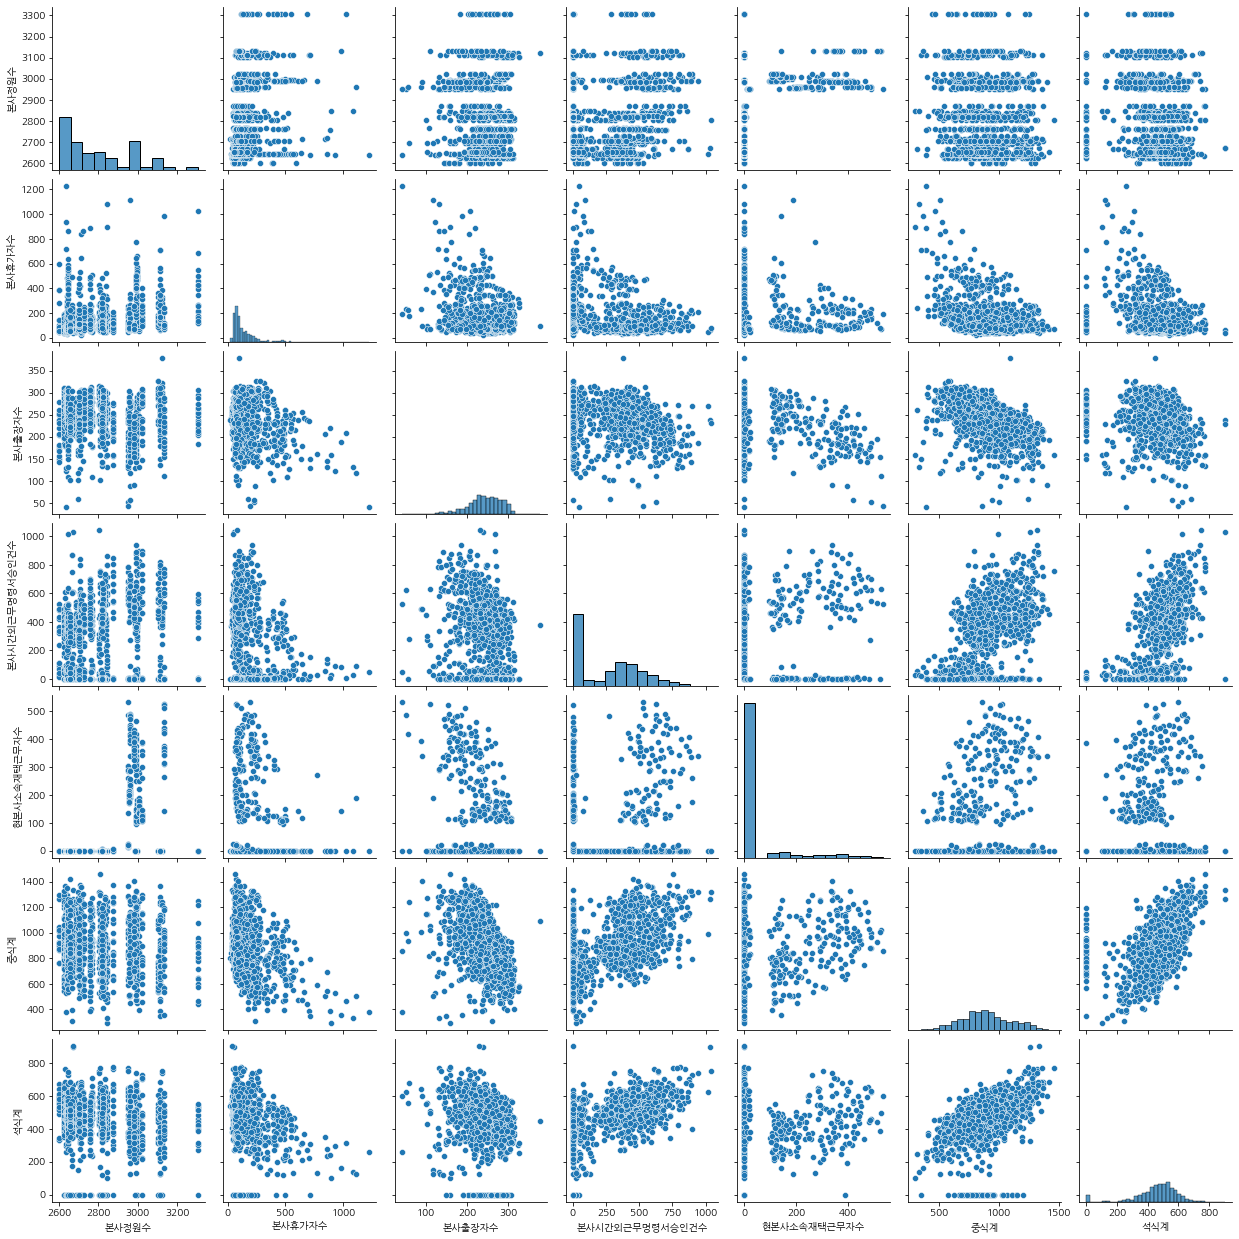

In [90]:
plt.figure(figsize = (10,10))
sns.pairplot(data = train)

In [96]:
temp = pd.crosstab(index = train.중식_메인반찬_분류, columns = train.요일, values = train.중식계, margins = True, aggfunc = 'mean').round(2)
temp = temp[['월', '화', '수', '목', '금']]
temp

요일,월,화,수,목,금
중식_메인반찬_분류,,,,,
고기류,1134.71,930.16,913.39,832.33,655.71
기타,1199.50,923.20,841.92,822.75,692.50
생선류,1154.24,894.88,875.70,791.17,659.86
야채류,1175.06,956.67,915.21,817.85,643.70
탄수류,1280.33,948.82,934.17,869.73,633.43
All,1144.33,925.62,905.21,823.99,653.61


### 식사 인원 데이터

In [68]:
# 중식계
pd.crosstab(index = train.연도, columns = train.월, values = train.중식계, aggfunc = 'mean', margins = True).round(1)

월,01,02,03,04,05,06,07,08,09,10,11,12,All
연도,,,,,,,,,,,,,
2016,NaN,967.9,962.2,893.8,943.4,932.8,904.1,912.4,950.6,1010.8,952.7,842.1,932.8
2017,1004.2,1024.7,948.0,868.0,858.1,871.2,861.4,866.0,905.0,942.6,851.2,783.4,897.6
2018,952.9,1007.3,967.9,879.2,886.1,874.7,848.4,846.2,886.7,916.4,799.1,752.4,882.9
2019,888.3,1003.8,930.4,855.5,843.8,820.8,807.8,819.9,919.6,868.0,752.6,735.5,850.5
2020,830.3,946.2,958.1,924.6,815.6,760.0,827.8,825.1,871.6,852.7,878.1,1048.5,882.3
2021,1009.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1009.7
All,934.2,989.6,953.6,883.6,869.8,863.3,848.7,854.8,907.1,917.8,847.3,827.3,890.3


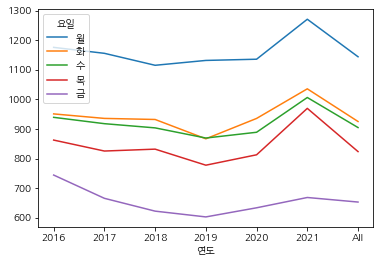

In [69]:
# 요일 별 중식인원 추이
df_temp = pd.crosstab(index = train.연도, columns = train.요일, values = train.중식계, aggfunc = 'mean', margins = True).round(1).copy()
df_temp = df_temp[['월', '화', '수', '목', '금']]
df_temp.plot()

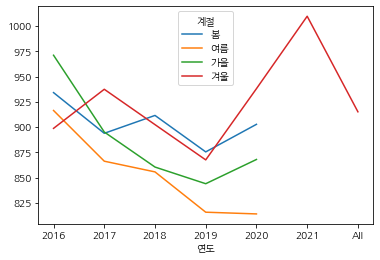

In [70]:
df_temp = pd.crosstab(index = train.연도, columns = train.계절, values = train.중식계, aggfunc = 'mean', margins = True).round(1).copy()
df_temp = df_temp[['봄','여름', '가을', '겨울']]
df_temp.plot()

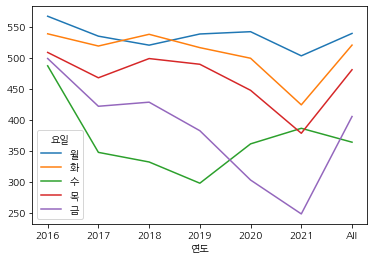

In [71]:
# 요일 별 석식인원 추이
df_temp = pd.crosstab(index = train.연도, columns = train.요일, values = train.석식계, aggfunc = 'mean', margins = True).round(1).copy()
df_temp = df_temp[['월', '화', '수', '목', '금']]
df_temp.plot()

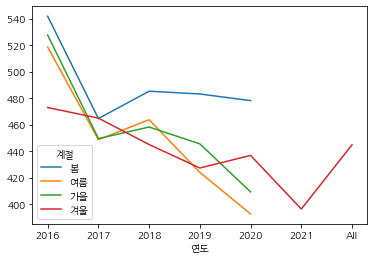

In [72]:
df_temp = pd.crosstab(index = train.연도, columns = train.계절, values = train.석식계, aggfunc = 'mean', margins = True).round(1).copy()
df_temp = df_temp[['봄','여름', '가을', '겨울']]
df_temp.plot()

In [73]:
# 

In [74]:
# 

In [75]:
# 